# 지도시각화 test code

## 00. 기본 설정

In [1]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지는 출력되지 않게 합니다.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [3]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

#------------------------------------------------------------------------------------
#matplotlib 패키지 한글 깨짐 처리 끝

# windows
#plt.rcParams['font.family'] = "NanumBarunGothic" 또는 "Malgun Gothic"
#plt.rcParams['axes.unicode_minus'] = False

# apple 사용자는
#plt.rc("font", family="AppleGothic")
#plt.rc("axes", unicode_minus=False)

In [4]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<IPython.core.display.Javascript object>


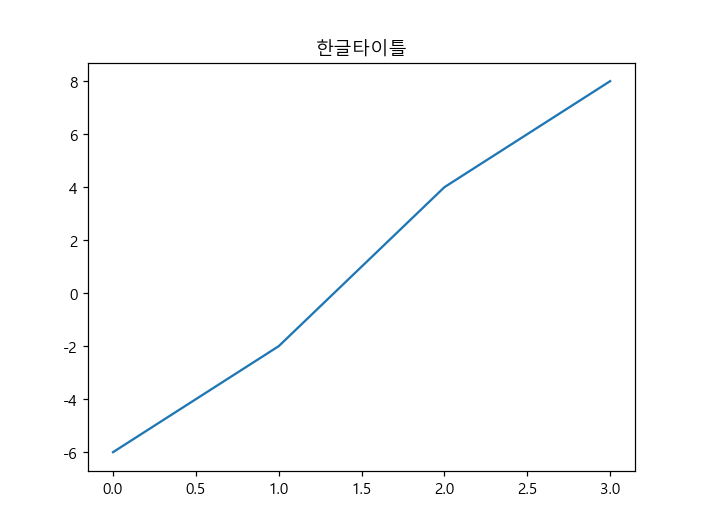

<Axes: title={'center': '한글타이틀'}>

In [5]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-6, -2, 4, 8]).plot(title="한글타이틀")

In [6]:
plt.close('all')

## 01. 데이터 불러오기

In [7]:
df = pd.read_excel("data_prep_dd.xlsx")
df.head(3)

,YM,MCT_NM,OP_YMD,TYPE,MCT_TYPE,latitude,longitude,ADDR,RANK_CNT,RANK_AMT,...,HR_18_22_UE_CNT_RAT,HR_23_4_UE_CNT_RAT,LOCAL_UE_CNT_RAT,RC_M12_MAL_CUS_CNT_RAT,RC_M12_FME_CUS_CNT_RAT,RC_M12_AGE_UND_20_CUS_CNT_RAT,RC_M12_AGE_30_CUS_CNT_RAT,RC_M12_AGE_40_CUS_CNT_RAT,RC_M12_AGE_50_CUS_CNT_RAT,RC_M12_AGE_OVR_60_CUS_CNT_RAT
0,202301,희야네식당,20000916,T1,가정식,33.279498,126.719772,제주 서귀포시 남원읍 남원리 100-3번지,3,4,...,0.000000,0.0,0.381616,0.644,0.356,0.183,0.232,0.351,0.171,0.063
1,202301,희신이네,20060515,T1,가정식,33.263389,126.550838,제주 서귀포시 서홍동 1651-11번지,3,4,...,0.264706,0.0,0.701183,0.686,0.314,0.118,0.261,0.342,0.190,0.089
2,202301,흥미,20030814,T1,가정식,33.490006,126.495004,제주 제주시 연동 291-40번지,4,4,...,0.094340,0.0,0.736842,0.562,0.438,0.107,0.299,0.336,0.226,0.032


In [8]:
# 컬럼명 확인
df.columns

Index(['YM', 'MCT_NM', 'OP_YMD', 'TYPE', 'MCT_TYPE', 'latitude', 'longitude',
       'ADDR', 'RANK_CNT', 'RANK_AMT', 'RANK_MEAN', 'MON_UE_CNT_RAT',
       'TUE_UE_CNT_RAT', 'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT',
       'SAT_UE_CNT_RAT', 'SUN_UE_CNT_RAT', 'HR_5_11_UE_CNT_RAT',
       'HR_12_13_UE_CNT_RAT', 'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT',
       'HR_23_4_UE_CNT_RAT', 'LOCAL_UE_CNT_RAT', 'RC_M12_MAL_CUS_CNT_RAT',
       'RC_M12_FME_CUS_CNT_RAT', 'RC_M12_AGE_UND_20_CUS_CNT_RAT',
       'RC_M12_AGE_30_CUS_CNT_RAT', 'RC_M12_AGE_40_CUS_CNT_RAT',
       'RC_M12_AGE_50_CUS_CNT_RAT', 'RC_M12_AGE_OVR_60_CUS_CNT_RAT'],
      dtype='object')

In [9]:
df.shape

(67857, 31)

In [10]:
# 현지인이 선택한 맛집 (LOCAK_UE_CNT_RAT)
# TYPE별 구별 위치 분포 (folium 지역/색상 시각화) [TYPE]
# 옵션 [SEASON]
# 계절 먼저 선택 >> 나이별 회원 수 비중이 높은 곳

In [11]:
# 현지인 이용 건수 비중 확인 먼저 >> 필요한 칼럼만 추출
col_names = ['YM', 'MCT_NM', 'TYPE', 'latitude', 'longitude', 'ADDR',
            'LOCAL_UE_CNT_RAT']

In [12]:
df_local = df[col_names]
df_local.head(1)

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202301,희야네식당,T1,33.279498,126.719772,제주 서귀포시 남원읍 남원리 100-3번지,0.381616


In [13]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67857 entries, 0 to 67856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YM                67857 non-null  int64  
 1   MCT_NM            67857 non-null  object 
 2   TYPE              67857 non-null  object 
 3   latitude          67857 non-null  float64
 4   longitude         67857 non-null  float64
 5   ADDR              67857 non-null  object 
 6   LOCAL_UE_CNT_RAT  67857 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.6+ MB


In [14]:
df_local.describe()

,YM,latitude,longitude,LOCAL_UE_CNT_RAT
count,67857.000000,67857.000000,67857.000000,67857.000000
mean,202306.478801,33.426563,126.519642,0.468005
std,3.445896,0.105855,0.153407,0.298131
min,202301.000000,33.114466,126.164116,0.000000
25%,202303.000000,33.325196,126.463624,0.159108
50%,202307.000000,33.483431,126.514001,0.501193
75%,202309.000000,33.498588,126.562812,0.753606
max,202312.000000,33.963670,126.969007,1.000000


In [15]:
# 현지인이용비중이 0.5 이상인 행만 추출
df_over_50 = df_local[df_local['LOCAL_UE_CNT_RAT'] >= 0.5]
df_over_50.shape   # 67857 >> 34044 : 33813개의 행 삭제

(34044, 7)

In [34]:
# df_over_50 데이터프레임 저장
df_over_50.to_csv("local_over_50.csv", encoding='cp949', index=False)

## 02. 지도시각화

In [16]:
import folium

In [17]:
# 지도의 중심을 정하기 위해 위도와 경도의 평균을 구함
lat = df_over_50['latitude'].mean() - 0.1
long = df_over_50['longitude'].mean() + 0.05
lat, long

(33.35032089092058, 126.56251560792505)

In [18]:
# zoom_start로 화면 크기 지정
m = folium.Map([lat, long], zoom_start=10)
m

In [19]:
# 우선 테이블의 상위 5개 데이터만 지도에 표시
for i in df_over_50.index[:5]:
    sub_lat = df_over_50.loc[i, 'latitude']
    sub_long = df_over_50.loc[i, 'longitude']
    
    title = df_over_50.loc[i, 'MCT_NM'] + '-' + df_over_50.loc[i, 'ADDR']
    name = df_over_50.loc[i, 'MCT_NM']
    print(i, sub_lat, sub_long, title)
    
    folium.Marker([sub_lat, sub_long], tootip=title,
                  popup=name
                 ).add_to(m)
m

1 33.2633891 126.5508375 희신이네-제주 서귀포시 서홍동 1651-11번지
2 33.4900057 126.4950045 흥미-제주 제주시 연동 291-40번지
8 33.2588976 126.5733142 흑미가-제주 서귀포시 동홍동 62-1번지 1층
26 33.4847834 126.466938 흑돈시범이네-제주 제주시 노형동 2882-1번지
30 33.4900167 126.4336584 휴계농장외도점-제주 제주시 외도일동 485-7번지 1층


## 03. 현지인 비중 order by

In [21]:
df_local_rank = df_over_50.sort_values('LOCAL_UE_CNT_RAT', ascending=False)
df_local_rank.head(3)

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
59609,202309,온기,T6,33.495023,126.546744,제주 제주시 이도이동 1952-5번지 지하1층,1.0
27648,202307,도원유통,T15,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.0
57727,202308,샤커,T6,33.487672,126.431772,제주 제주시 외도일동 550-7번지 2층,1.0


In [22]:
# 인덱스 리셋
df_local_rank = df_local_rank.reset_index(drop=True)
df_local_rank.head(3)

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202309,온기,T6,33.495023,126.546744,제주 제주시 이도이동 1952-5번지 지하1층,1.0
1,202307,도원유통,T15,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.0
2,202308,샤커,T6,33.487672,126.431772,제주 제주시 외도일동 550-7번지 2층,1.0


In [23]:
df_local_rank.shape

(34044, 7)

In [24]:
# 현지인 비중이 1인 식당은 총 113개 
count = df_local_rank[df_local_rank['LOCAL_UE_CNT_RAT'] == 1].shape[0]
count

113

In [25]:
# 각 월별 현지인 이용 비중이 가장 높은 상위 5개 식당을 추출
top_5_per_month = df_local_rank.groupby('YM').apply(lambda x: x.nlargest(5, 'LOCAL_UE_CNT_RAT')).reset_index(drop=True)
top_5_per_month

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202301,온기,T6,33.495023,126.546744,제주 제주시 이도이동 1952-5번지 지하1층,1.0
1,202301,금하순대,T6,33.441213,126.288633,제주 제주시 한림읍 귀덕리 2979번지,1.0
2,202301,코코망가스,T6,33.403414,126.450887,제주 제주시 애월읍 광령리 1039-3번지 2층,1.0
3,202301,친구,T11,33.491800,126.479839,제주 제주시 연동 1953-3번지,1.0
4,202301,차화술,T1,33.509923,126.532849,제주 제주시 일도이동 1020-21번지 2층,1.0
5,202302,비에이치,T25,33.476915,126.450666,제주 제주시 도평동 965-2번지,1.0
6,202302,효진이네,T1,33.248990,126.567121,제주 서귀포시 서귀동 256-35번지,1.0
7,202302,그라인딩홀덤펍,T6,33.503215,126.541985,제주 제주시 이도이동 408-1번지 2층 201호,1.0
8,202302,화용다방,T26,33.248671,126.563087,제주 서귀포시 서귀동 275-7번지 2층,1.0
9,202302,사쿠라,T1,33.486351,126.431391,제주 제주시 외도일동 549-6번지 2층,1.0


In [26]:
# 월별로 LOCAL_UE_CNT_RAT가 1인 식당의 개수 계산
local_rate_1 = df_local_rank[df_local_rank['LOCAL_UE_CNT_RAT'] == 1].groupby('YM').size()
local_rate_1

YM
202301     9
202302    12
202303    11
202304     9
202305     8
202306     9
202307    13
202308    12
202309     9
202310     8
202311     6
202312     7
dtype: int64

In [27]:
# TYPE별로 LOCAL_UE_CNT_RAT가 1인 식당의 개수 계산
type_rate_1 = df_local_rank[df_local_rank['LOCAL_UE_CNT_RAT'] == 1].groupby('TYPE').size()
type_rate_1

TYPE
T1     24
T11     1
T13     1
T14     1
T15     8
T18     1
T2      1
T20     5
T25     7
T26     4
T6     60
dtype: int64

In [28]:
df_local_rank.shape

(34044, 7)

In [29]:
highest_local_rate_by_type = df_local_rank.loc[df_local_rank.groupby(['YM', 'TYPE'])['LOCAL_UE_CNT_RAT'].idxmax()]
highest_local_rate_by_type

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
37,202301,차화술,T1,33.509923,126.532849,제주 제주시 일도이동 1020-21번지 2층,1.000000
183,202301,떡마을,T10,33.496693,126.537965,제주 제주시 이도이동 1069-3번지,0.949153
32,202301,친구,T11,33.491800,126.479839,제주 제주시 연동 1953-3번지,1.000000
30118,202301,녹두네,T12,33.485072,126.484723,제주 제주시 노형동 939-7번지,0.570513
1347,202301,빵집이야기,T13,33.509263,126.536503,제주 제주시 일도이동 316번지 일도빌라 105호,0.898773
...,...,...,...,...,...,...,...
1066,202312,토대력올레점,T5,33.502363,126.542510,제주 제주시 이도이동 408-6번지,0.903805
20,202312,조커,T6,33.501309,126.543160,제주 제주시 이도이동 409-4번지 2층,1.000000
14248,202312,던킨제주시청점,T7,33.500081,126.529235,제주 제주시 이도이동 1772-1번지,0.780774
3608,202312,한솥도시락 제주화북점,T8,33.519753,126.572361,제주 제주시 화북일동 1230번지,0.869822


In [30]:
high_rate_02 = highest_local_rate_by_type[highest_local_rate_by_type['YM'] == 202302]

In [31]:
# 우선 테이블의 상위 5개 데이터만 지도에 표시
for i in high_rate_02[:10].index:
    sub_lat = df_local.loc[i, 'latitude']
    sub_long = df_local.loc[i, 'longitude']
    
    title = df_local.loc[i, 'MCT_NM'] + '-' + df_local.loc[i, 'ADDR']
    name = df_local.loc[i, 'MCT_NM']
    print(i, sub_lat, sub_long, title)
    
    folium.Marker([sub_lat, sub_long], tootip=title,
                  popup=name
                 ).add_to(m)
m

6 33.5127096 126.4845144 흑본오겹 제주공항점-제주 제주시 용담삼동 2572번지 1층
1840 33.5030816 126.5428557 남원바당-제주 제주시 일도이동 48-4번지
671 33.451368 126.9142163 일호반식당-제주 서귀포시 성산읍 고성리 1194-1번지
22693 33.2177154 126.2499247 신미영이네-제주 서귀포시 대정읍 하모리 770-29번지
252 33.2398736 126.5052797 탐복-제주 서귀포시 강정동 418번지 1층
3255 33.2458578 126.3306689 생원전복-제주 서귀포시 안덕면 화순리 1040-5번지
107 33.4652173 126.9352912 해룡흑도새기-제주 서귀포시 성산읍 성산리 285-1번지 1층
3418 33.5175502 126.5739092 보말과비바리-제주 제주시 화북일동 12-4번지 상가동 106호
1085 33.2181467 126.2500715 수눌음-제주 서귀포시 대정읍 하모리 770-47번지
28569 33.4982619 126.498018 써브웨이 제주공항점-제주 제주시 용담이동 1731-1번지 1층 써브웨이 제주공항점


In [37]:
# TYPE별 현지인 이용 비중이 0.5를 넘는 식당 수
df_local_rank['TYPE'].value_counts()

TYPE
T6     12145
T1     10721
T26     2232
T25     1470
T23     1215
T13     1105
T15      987
T11      867
T21      700
T20      673
T5       435
T29      394
T18      204
T2       185
T16      174
T30      124
T8        88
T10       56
T4        56
T28       39
T9        38
T27       31
T7        24
T24       19
T14       16
T3        15
T19       14
T12       11
T17        6
Name: count, dtype: int64

-----------------------------------가정식 T1
구내식당/푸드코트 T2
기사식당	T3
기타세계요리	T4
꼬치구이	T5
----------------------------------- 단품요리 전문 T6
도너츠	T7
도시락	T8
동남아/인도음식	T9
떡/한과	T10
맥주/요리주점	T11
민속주점	T12
베이커리	T13
부페	T14
분식	T15
샌드위치/토스트	T16
스테이크	T17
아이스크림/빙수	T18
야식	T19
양식	T20
일식	T21
주스	T22
중식	T23
차	T24
치킨	T25
커피	T26
패밀리 레스토랑	T27
포장마차	T28
피자	T29
햄버거	T30

In [39]:
type_ym_counts = df_local_rank.groupby(['TYPE', 'YM']).size().reset_index(name='count')

In [42]:
type_ym_counts[type_ym_counts['TYPE'] == 'T2']

,TYPE,YM,count
122,T2,202301,18
123,T2,202302,16
124,T2,202303,14
125,T2,202304,14
126,T2,202305,16
127,T2,202306,16
128,T2,202307,17
129,T2,202308,16
130,T2,202309,13
131,T2,202310,16


In [48]:
df_over_60 = df_local[df_local['LOCAL_UE_CNT_RAT'] >= 0.9]
df_over_60.shape

(1284, 7)

In [49]:
df_over_60['TYPE'].value_counts()

TYPE
T6     543
T1     339
T25    112
T20     46
T11     45
T15     41
T29     30
T18     29
T5      17
T21     15
T2      14
T13     12
T23     11
T26     11
T28      8
T10      7
T4       3
T14      1
Name: count, dtype: int64

In [50]:
df_over_60['YM'].value_counts()

YM
202308    124
202312    122
202303    114
202302    111
202307    111
202311    110
202310    107
202309    102
202301    101
202304     97
202306     93
202305     92
Name: count, dtype: int64

In [47]:
df_over_60.groupby(['TYPE', 'YM']).size().reset_index(name='count')

,TYPE,YM,count
0,T1,202301,29
1,T1,202302,31
2,T1,202303,34
3,T1,202304,26
4,T1,202305,22
...,...,...,...
166,T6,202308,48
167,T6,202309,46
168,T6,202310,51
169,T6,202311,44


In [51]:
df_over_60['MCT_NM'].unique()

array(['화북신안', '한라생얼큰이', '퍼드림식당', '탁탁', '춤추는식탁', '참맛골', '차화술', '차곡',
       '진향갈비', '지원', '주민상회 노형점', '주민상회', '제라진국밥', '인자숯불갈비2호점', '인자숯불갈비',
       '외도골목대장', '어우렁더우렁', '알에프(RF)', '심심포차', '스페샬삼도점', '순덕이네왕갈비',
       '순곱이네일도점', '삼화왕갈비', '빨간집삼화지구점', '빨간집베라체점', '먹자', '놀부네', '김반장',
       '고기대박집우방', '효진이네', '현정(상모1리마을회)', '한라생얼큰이 아라점', '통큰국밥', '제주태원',
       '제주돈갈매기', '정든공간', '일품왕솥뚜껑', '우원', '오라돈돈', '양푼왕갈비', '솔담2',
       '서귀포일터나눔 지역자활센터 - 엄블랑디', '사쿠라', '미식가', '미녀', '금화', '황재돈', '킴스커틀렛',
       '주식회사 전철우고향랭면', '일도돈', '아하', '송이축산정육식당삼양점', '부가네얼큰이인제점', '봄날의춘천',
       '동홍소량', '꾸어삼겹', '경춘선', '100번지숯불구이', '버뮤다제주', '부가네얼큰이일도점', '큰나무집',
       '케이오늘', '육화담', '서도가든', '일이삼식당', '돈우랑', '구이소', '독불장군', '풀향기',
       '수문미트', '탕후루에꼬치다', '목민', '오복돈', '세영이네', '쌍팔련도', '탐궁숯불갈비', '양반집',
       '연가갈비', '송송숯불두마리치킨앤곱꼬닭', '과수원집', '황궁갈비', '창성상회', '총총휴게음식점', '금조',
       '숙이네갈비', '선지왓숯불갈비', '대란갈비', '제주도강어멍', '남광로127', '따봉', '부가네얼큰이 동홍점',
       '소돈정육식당', '신설돈가', '프라이드프라이드', '서부식당', '천도두루치기', '초량화성', '화초',
       '